In [8]:
import cx_Oracle
import pandas as pd
import numpy as np
from tqdm import trange
import sqlalchemy
from sqlalchemy import create_engine
import csv

# sales

In [66]:
data = pd.read_csv(r'C:\Users\chomk\Desktop\data_table\sales.csv', encoding='cp949')

In [67]:
data

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,SVC_INDUTY_CD,SVC_INDUTY_CD_NM,THSMON_SELNG_AMT,THSMON_SELNG_CO,...,TMZON_21_24_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO,STOR_CO
0,2017,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,8.168902e+08,28082,...,1144,15424,6832,152,1308,2807,5298,6917,5776,27
1,2017,1,A,골목상권,2110001,이북5도청사,CS100007,치킨전문점,1.922325e+07,517,...,303,336,111,0,41,93,198,76,41,3
2,2017,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,7.548342e+07,5755,...,40,2319,2294,33,715,1156,1377,893,446,9
3,2017,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,4.611523e+07,1306,...,391,720,358,9,193,124,287,315,149,9
4,2017,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,2.204141e+07,1607,...,80,870,562,0,182,355,435,240,218,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791413,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,9.971574e+08,14124,...,423,6916,5717,105,3128,4161,2715,1194,1328,5
791414,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,1.191179e+10,6524,...,0,2704,3820,0,23,494,1493,1634,2880,6
791415,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,1.717077e+09,8760,...,66,3585,4551,144,1800,1852,1392,926,2021,8
791416,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,1.256692e+07,370,...,0,0,370,0,0,0,0,370,0,4


### 년도, 분기, 서비스 업종 코드명,상권_코드 명, 점포수
* 매출 건수 - 요일, 시간대, 성별, 연령대
* 매출 금액 - 요일, 시간대, 성별, 연령대

In [11]:
#1차 작업
year = 2017
quarter = 1
svc_name = '네일숍'
trdar_name = '명지대학교'

In [12]:
#data2=data.loc[(data['STDR_YY_CD']==year) & (data['STDR_QU_CD']==quarter)
       # &(data['SVC_INDUTY_CD_NM']==svc_name) &(data['TRDAR_CD_NM']==trdar_name)]

TypeError: unsupported operand type(s) for &: 'int' and 'str'

In [13]:
#data2

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,SVC_INDUTY_CD,SVC_INDUTY_CD_NM,THSMON_SELNG_AMT,THSMON_SELNG_CO,...,TMZON_21_24_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO,STOR_CO
12412,2017,1,A,골목상권,2110507,명지대학교,CS200029,네일숍,22116390.0,472,...,36,85,387,0,107,164,129,54,18,5


In [68]:
#2차 작업
check_co = '건수'
# check_co = '금액'

In [69]:
if check_co == '금액':
    #금액
    data3=data[['STDR_YY_CD','STDR_QU_CD','TRDAR_SE_CD_NM','MDWK_SELNG_AMT','WKEND_SELNG_AMT',
           'MON_SELNG_AMT','TUES_SELNG_AMT','WED_SELNG_AMT','THUR_SELNG_AMT','FRI_SELNG_AMT',
          'SAT_SELNG_AMT','SUN_SELNG_AMT','TMZON_00_06_SELNG_AMT','TMZON_06_11_SELNG_AMT',
           'TMZON_11_14_SELNG_AMT','TMZON_14_17_SELNG_AMT','TMZON_17_21_SELNG_AMT','TMZON_21_24_SELNG_AMT',
          'ML_SELNG_AMT','FML_SELNG_AMT','AGRDE_10_SELNG_AMT','AGRDE_20_SELNG_AMT','AGRDE_30_SELNG_AMT',
           'AGRDE_40_SELNG_AMT','AGRDE_50_SELNG_AMT','AGRDE_60_ABOVE_SELNG_AMT','STOR_CO']]
elif check_co == '건수':
    #건수
    data3 = data[['STDR_YY_CD','STDR_QU_CD','TRDAR_SE_CD_NM','MDWK_SELNG_CO','WKEND_SELNG_CO',
               'MON_SELNG_CO','TUES_SELNG_CO','WED_SELNG_CO','THUR_SELNG_CO','FRI_SELNG_CO',
               'SAT_SELNG_CO','SUN_SELNG_CO','TMZON_00_06_SELNG_CO','TMZON_06_11_SELNG_CO',
               'TMZON_11_14_SELNG_CO','TMZON_14_17_SELNG_CO','TMZON_17_21_SELNG_CO',
               'TMZON_21_24_SELNG_CO','ML_SELNG_CO','FML_SELNG_CO','AGRDE_10_SELNG_CO',
               'AGRDE_20_SELNG_CO','AGRDE_30_SELNG_CO','AGRDE_40_SELNG_CO','AGRDE_50_SELNG_CO','AGRDE_60_ABOVE_SELNG_CO',
               'STOR_CO']]

In [70]:
data3

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD_NM,MDWK_SELNG_CO,WKEND_SELNG_CO,MON_SELNG_CO,TUES_SELNG_CO,WED_SELNG_CO,THUR_SELNG_CO,FRI_SELNG_CO,...,TMZON_21_24_SELNG_CO,ML_SELNG_CO,FML_SELNG_CO,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO,STOR_CO
0,2017,1,골목상권,18996,9086,3618,3575,4026,3855,3922,...,1144,15424,6832,152,1308,2807,5298,6917,5776,27
1,2017,1,골목상권,313,204,58,64,75,29,87,...,303,336,111,0,41,93,198,76,41,3
2,2017,1,골목상권,4216,1539,884,895,654,833,950,...,40,2319,2294,33,715,1156,1377,893,446,9
3,2017,1,골목상권,717,589,140,147,132,143,155,...,391,720,358,9,193,124,287,315,149,9
4,2017,1,골목상권,1419,188,236,293,297,312,281,...,80,870,562,0,182,355,435,240,218,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791413,2021,4,관광특구,9891,4233,1601,1514,1861,2053,2862,...,423,6916,5717,105,3128,4161,2715,1194,1328,5
791414,2021,4,관광특구,3676,2848,611,623,798,833,811,...,0,2704,3820,0,23,494,1493,1634,2880,6
791415,2021,4,관광특구,6040,2720,1128,1217,810,1052,1833,...,66,3585,4551,144,1800,1852,1392,926,2021,8
791416,2021,4,관광특구,370,0,0,0,370,0,0,...,0,0,370,0,0,0,0,370,0,4


In [71]:
#날짜 데이터
sales_date = data3.iloc[:,[0,1]]
sales_date

,STDR_YY_CD,STDR_QU_CD
0,2017,1
1,2017,1
2,2017,1
3,2017,1
4,2017,1
...,...,...
791413,2021,4
791414,2021,4
791415,2021,4
791416,2021,4


In [72]:
#요구 데이터
client_data = data3.iloc[:,5:12]
client_data

,MON_SELNG_CO,TUES_SELNG_CO,WED_SELNG_CO,THUR_SELNG_CO,FRI_SELNG_CO,SAT_SELNG_CO,SUN_SELNG_CO
0,3618,3575,4026,3855,3922,4212,4874
1,58,64,75,29,87,135,69
2,884,895,654,833,950,792,747
3,140,147,132,143,155,280,309
4,236,293,297,312,281,109,79
...,...,...,...,...,...,...,...
791413,1601,1514,1861,2053,2862,2227,2006
791414,611,623,798,833,811,1943,905
791415,1128,1217,810,1052,1833,1640,1080
791416,0,0,370,0,0,0,0


In [73]:
주말 = data3.iloc[:,3:5]

In [74]:
주말

,MDWK_SELNG_CO,WKEND_SELNG_CO
0,18996,9086
1,313,204
2,4216,1539
3,717,589
4,1419,188
...,...,...
791413,9891,4233
791414,3676,2848
791415,6040,2720
791416,370,0


In [75]:
요일 = data3.iloc[:,5:12]
요일

,MON_SELNG_CO,TUES_SELNG_CO,WED_SELNG_CO,THUR_SELNG_CO,FRI_SELNG_CO,SAT_SELNG_CO,SUN_SELNG_CO
0,3618,3575,4026,3855,3922,4212,4874
1,58,64,75,29,87,135,69
2,884,895,654,833,950,792,747
3,140,147,132,143,155,280,309
4,236,293,297,312,281,109,79
...,...,...,...,...,...,...,...
791413,1601,1514,1861,2053,2862,2227,2006
791414,611,623,798,833,811,1943,905
791415,1128,1217,810,1052,1833,1640,1080
791416,0,0,370,0,0,0,0


In [76]:
시간대 = data3.iloc[:,12:18]
시간대

,TMZON_00_06_SELNG_CO,TMZON_06_11_SELNG_CO,TMZON_11_14_SELNG_CO,TMZON_14_17_SELNG_CO,TMZON_17_21_SELNG_CO,TMZON_21_24_SELNG_CO
0,62,2559,11878,4674,7765,1144
1,63,0,0,6,145,303
2,0,942,2501,792,1480,40
3,82,0,70,316,447,391
4,12,23,906,336,250,80
...,...,...,...,...,...,...
791413,0,1097,3967,3290,5347,423
791414,0,305,1834,2857,1528,0
791415,0,126,2507,2763,3298,66
791416,0,0,0,0,370,0


In [77]:
성별 = data3.iloc[:,18:20]
성별

,ML_SELNG_CO,FML_SELNG_CO
0,15424,6832
1,336,111
2,2319,2294
3,720,358
4,870,562
...,...,...
791413,6916,5717
791414,2704,3820
791415,3585,4551
791416,0,370


In [78]:
연령대 = data3.iloc[:,20:26]
연령대

,AGRDE_10_SELNG_CO,AGRDE_20_SELNG_CO,AGRDE_30_SELNG_CO,AGRDE_40_SELNG_CO,AGRDE_50_SELNG_CO,AGRDE_60_ABOVE_SELNG_CO
0,152,1308,2807,5298,6917,5776
1,0,41,93,198,76,41
2,33,715,1156,1377,893,446
3,9,193,124,287,315,149
4,0,182,355,435,240,218
...,...,...,...,...,...,...
791413,105,3128,4161,2715,1194,1328
791414,0,23,494,1493,1634,2880
791415,144,1800,1852,1392,926,2021
791416,0,0,0,0,370,0


In [79]:
import matplotlib.pyplot as plt

In [ ]:
시간대.plot(kind='bar',figsize=(20,15),fontsize=30)

# stores

In [27]:
data = pd.read_csv(r'C:\Users\chomk\Desktop\data_table\stores.csv', encoding='cp949')

In [28]:
data

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,SVC_INDUTY_CD,SVC_INDUTY_CD_NM,STOR_CO,SIMILR_INDUTY_STOR_CO,OPBIZ_RT,OPBIZ_STOR_CO,CLSBIZ_RT,CLSBIZ_STOR_CO,FRC_STOR_CO
0,2017,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,27,29,3,1,3,1,2
1,2017,1,A,골목상권,2110001,이북5도청사,CS100002,중식음식점,0,1,0,0,0,0,1
2,2017,1,A,골목상권,2110001,이북5도청사,CS100003,일식음식점,2,2,0,0,0,0,0
3,2017,1,A,골목상권,2110001,이북5도청사,CS100004,양식음식점,4,4,0,0,0,0,0
4,2017,1,A,골목상권,2110001,이북5도청사,CS100005,제과점,0,1,0,0,100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036890,2019,4,A,골목상권,2111090,강일동주민센터,CS300029,애완동물,1,1,0,0,0,0,0
1036891,2019,4,A,골목상권,2111090,강일동주민센터,CS300032,가전제품,1,1,0,0,0,0,0
1036892,2019,4,A,골목상권,2111090,강일동주민센터,CS300036,조명용품,1,1,0,0,0,0,0
1036893,2019,4,A,골목상권,2111090,강일동주민센터,CS300038,자동차부품,1,1,0,0,0,0,0


In [29]:
#1차 작업
year = 2017
quarter = 1
svc_name = '네일숍'
trdar_name = '명지대학교'

In [30]:
data2=data.loc[(data['STDR_YY_CD']==year) & (data['STDR_QU_CD']==quarter)
        &(data['SVC_INDUTY_CD_NM']==svc_name) &(data['TRDAR_CD_NM']==trdar_name)]

In [31]:
data2

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,SVC_INDUTY_CD,SVC_INDUTY_CD_NM,STOR_CO,SIMILR_INDUTY_STOR_CO,OPBIZ_RT,OPBIZ_STOR_CO,CLSBIZ_RT,CLSBIZ_STOR_CO,FRC_STOR_CO
39520,2017,1,A,골목상권,2110507,명지대학교,CS200029,네일숍,2,2,0,0,0,0,0


In [32]:
점포수=data2.iloc[:,8]
점포수

39520    2
Name: STOR_CO, dtype: int64

In [33]:
유사업종점포수=data2.iloc[:,9]
유사업종점포수

39520    2
Name: SIMILR_INDUTY_STOR_CO, dtype: int64

In [34]:
개업율 = data2.iloc[:,10]
개업율

39520    0
Name: OPBIZ_RT, dtype: int64

In [35]:
개업점포수 = data2.iloc[:,11]
개업점포수

39520    0
Name: OPBIZ_STOR_CO, dtype: int64

In [36]:
폐업률 = data2.iloc[:,12]
폐업률

39520    0
Name: CLSBIZ_RT, dtype: int64

In [37]:
폐업점포수 = data2.iloc[:,13]
폐업점포수

39520    0
Name: CLSBIZ_STOR_CO, dtype: int64

In [38]:
프렌차이즈점포수 = data2.iloc[:,14]
프렌차이즈점포수

39520    0
Name: FRC_STOR_CO, dtype: int64

# Floation_pupulation

In [39]:
data = pd.read_csv(r'C:\Users\chomk\Desktop\data_table\floation_population.csv', encoding='cp949')

In [40]:
data

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,TOT_FLPOP_CO,ML_FLPOP_CO,FML_FLPOP_CO,AGRDE_10_FLPOP_CO,...,TMZON_4_FLPOP_CO,TMZON_5_FLPOP_CO,TMZON_6_FLPOP_CO,MON_FLPOP_CO,TUES_FLPOP_CO,WED_FLPOP_CO,THUR_FLPOP_CO,FRI_FLPOP_CO,SAT_FLPOP_CO,SUN_FLPOP_CO
0,2017,1,A,골목상권,1000001,계동길,502274,284549,217723,32196,...,121701,115770,26974,70988,75933,82259,86575,77980,60851,47686
1,2017,1,A,골목상권,1000002,난계로27길,1849909,1020808,829099,69032,...,404696,370213,165667,246605,256125,272670,280900,278338,272562,242712
2,2017,1,A,골목상권,1000003,돈화문로11가길,1303692,794470,509224,28623,...,269741,326097,136492,181589,194169,210054,213729,206578,175237,122340
3,2017,1,A,골목상권,1000004,명륜길,998657,547947,450726,152588,...,166876,186743,102149,137196,147479,163187,158953,148204,131219,112414
4,2017,1,A,골목상권,1000005,백석동길,12998,4839,8164,1058,...,3030,2647,1274,1239,1517,1755,1834,1771,2393,2490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20195,2021,4,A,골목상권,1001006,천호대로197길,5792243,2655035,3137209,1095002,...,654437,940792,763931,825046,815341,811764,811313,813605,847448,867725
20196,2021,4,A,골목상권,1001007,천호대로219길,1305800,620639,685162,196720,...,146601,205153,165937,189650,189783,188564,188853,188771,179850,180330
20197,2021,4,A,골목상권,1001008,천호옛14길,6801241,3134348,3666893,793416,...,833945,1211074,881972,960423,954097,953208,954359,965338,1007534,1006283
20198,2021,4,A,골목상권,1001009,천호옛길,8390603,3861926,4528676,1214479,...,979470,1417661,1091812,1195998,1189151,1186391,1187143,1187620,1215066,1229234


In [41]:
#1차 작업
year = 2017
quarter = 1
trdar_name = '천호옛14길'

In [42]:
data2=data.loc[(data['STDR_YY_CD']==year) & (data['STDR_QU_CD']==quarter)
        &(data['TRDAR_CD_NM']==trdar_name)]

In [43]:

data2

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD,TRDAR_SE_CD_NM,TRDAR_CD,TRDAR_CD_NM,TOT_FLPOP_CO,ML_FLPOP_CO,FML_FLPOP_CO,AGRDE_10_FLPOP_CO,...,TMZON_4_FLPOP_CO,TMZON_5_FLPOP_CO,TMZON_6_FLPOP_CO,MON_FLPOP_CO,TUES_FLPOP_CO,WED_FLPOP_CO,THUR_FLPOP_CO,FRI_FLPOP_CO,SAT_FLPOP_CO,SUN_FLPOP_CO
1007,2017,1,A,골목상권,1001008,천호옛14길,2918979,1378344,1540637,196175,...,504946,748747,394786,377854,387614,416282,417772,433126,467223,419116


In [44]:
총생활인구수 = data2.iloc[:,6]
총생활인구수

1007    2918979
Name: TOT_FLPOP_CO, dtype: int64

In [45]:
성별생활인구수 = data2.iloc[:,7:9]
성별생활인구수

,ML_FLPOP_CO,FML_FLPOP_CO
1007,1378344,1540637


In [46]:
연령별생활인구수 = data2.iloc[:,9:15]
연령별생활인구수

,AGRDE_10_FLPOP_CO,AGRDE_20_FLPOP_CO,AGRDE_30_FLPOP_CO,AGRDE_40_FLPOP_CO,AGRDE_50_FLPOP_CO,AGRDE_60_ABOVE_FLPOP_CO
1007,196175,802161,609700,466267,485447,359240


In [47]:
시간별생활인구수 = data2.iloc[:,15:21]
시간별생활인구수

,TMZON_1_FLPOP_CO,TMZON_2_FLPOP_CO,TMZON_3_FLPOP_CO,TMZON_4_FLPOP_CO,TMZON_5_FLPOP_CO,TMZON_6_FLPOP_CO
1007,407930,411656,450928,504946,748747,394786


In [48]:
요일별생활인구수 = data2.iloc[:,21:29]
요일별생활인구수

,MON_FLPOP_CO,TUES_FLPOP_CO,WED_FLPOP_CO,THUR_FLPOP_CO,FRI_FLPOP_CO,SAT_FLPOP_CO,SUN_FLPOP_CO
1007,377854,387614,416282,417772,433126,467223,419116


<AxesSubplot:>

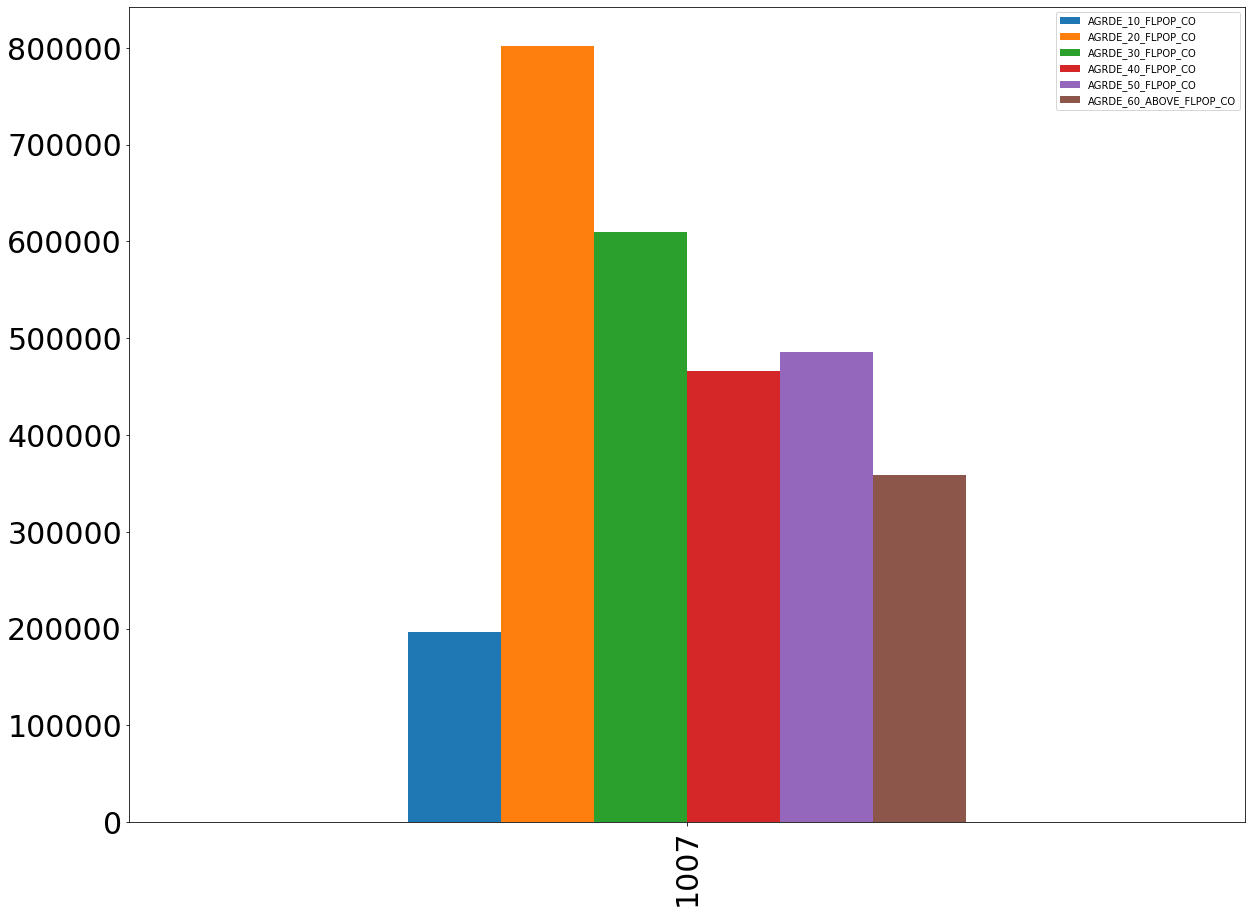

In [49]:
연령별생활인구수.plot(kind='bar',figsize=(20,15),fontsize=30)